## Asking and answering questions on Quora! 

### A story about a Quora user writing productivity and topics of interests. 

<p> I have been using Quora since 2015 mainly in its English version. Then in 2016 Quora became a multilingual 
    platform so I started using the Italian version as well.  I enjoyed writing each day, one or two answers about
    topics where I have professional experitise or simple human experience. In about four years of Quora experience 
    I have been writing more than 1500 answers to questions about programming languages such as Java, Python and R,
    data science algorithms, data collection and analysis, academic research, cultural aspects of of countries where 
    I have been living in, intercultural communication and geopolitics.  </p>

#### Now, as a data scientist I see the text of my answers as a dataset to analyze. Unfortunately, Quora has no API you can query to obtain the data but I found a way to download my answers through a Chrome plugin. So my Quora answers dataset contains : 
   - the date in which I wrote the corresponding answer, 
   - the questions to which I answerd and 
   - obviously the text of the answer. 
   

#### The questions that I have been asking about this dataset are related to: 
   - the number of questions that I wrote per day
   - how this number is distributed from a temporal perspective and a statistical perspective. 

#### In order to find some trends or patterns I have been asking questions on 
   - what are the most productive days of the week in which I have been writing more answers. For answering to this question I have been aggregating data by day of week.
   - what are the most productive months of the year, i.e. the months I have been answering more questions. From the analysis of these data different patterns emerge so..
   - I did a barplot graphics and a boxplot graphics respectively for showing those patterns. 
   - also a time-series plot of my activity on Quora where is shown the number of answers I have been answering per day.
   - the text of the answers is also interesting so I did a worldcloud graphics in order to show the most frequent words in my answers. Quora also uses those words to show on my profile on what topics I'm writing most.
   - with a pairwise correlation matrix graphics I show how the most frequent words (extracted in the previous step) are correlated. Unexpectedly two different clusters emerge.  
   - finally I have divided the Quora answers dataset in three data files (QuoraAnswersPerDay.csv,QuoraAnswersText.txt and QuoraCorrelationMatrixData.csv ) in order to visualize the data better.    

#### I have been using Python (Jupyter Notebook) for the analysis and data visualization. It is the best tool for me!   

In [16]:
# import the neccessary libraries
from pandas import read_csv
from matplotlib  import pyplot
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

### Here is a first summary description of the dataset. There is a max of 25 answers per day (yes, there are some days in which I enjoy to write answers on Quora :-) ) .. and a min of one answer a day. During the overall period I have been writing 3.21 answers per day on average, However the median (or 50% percentile) is equal to 2 answers per day so I would consider that as a more reliable measure. The Mean is a Conditional Mean as I have been writing answers only in 474 days in an 4 years period.

In [17]:
series = read_csv('QuoraAnswersPerDay.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
print(series.describe())

count    474.000000
mean       3.217300
std        3.154452
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       25.000000
Name: questions, dtype: float64


### Below the histogram of how the number of answers per day is distributed. It means that most days I would write between one and three answers but that is also a substantial amount of days (about 80) in which I have been writing between three and six answers. Finally for about 30 days I have been writing between six and eight answers.

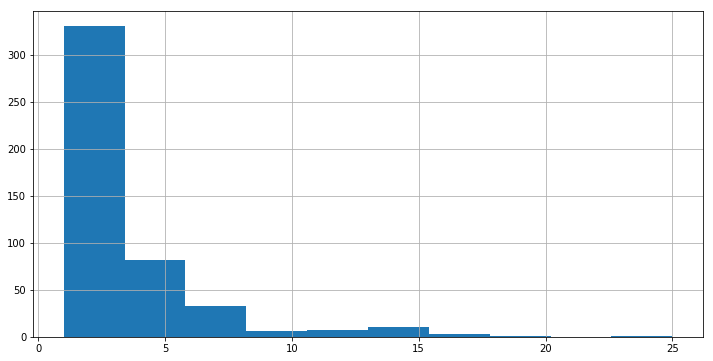

In [18]:
plt.figure(figsize=(12,6))
series.hist()
pyplot.show()

### ..and here a kernel density plot of how the number of answers per day is distrubuted

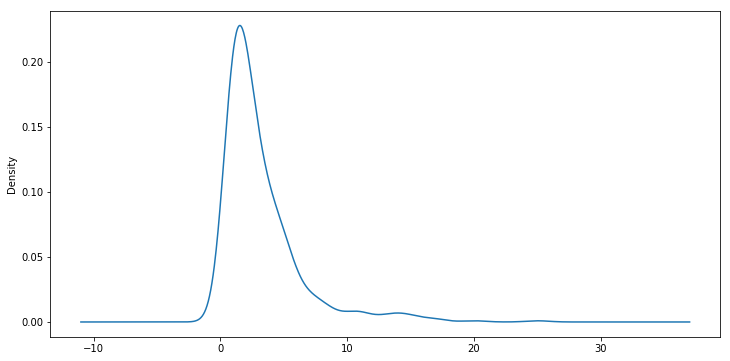

In [19]:
plt.figure(figsize=(12,6))
series.plot(kind='kde')
pyplot.show() 

### The boxplot graphics below shows the distribution of answers per day for every month of 2016. Exploring the data month by month with the following boxplot diagram,  can be seen how during the first half of the year I'm more active with writing answers while in the second half I write less answers per day.  

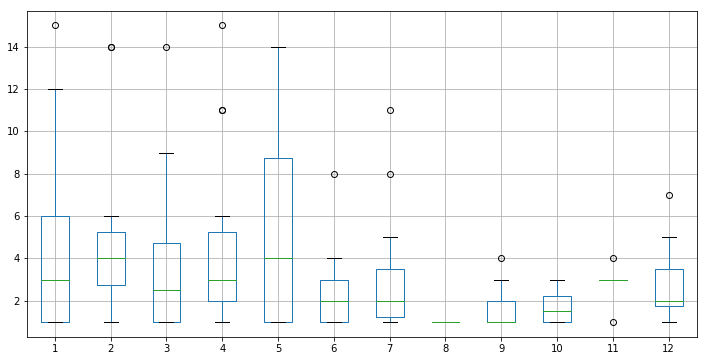

In [20]:
one_year_2016 = series['2016']
groups = one_year_2016.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.figure(figsize=(12,6))
months.boxplot()
pyplot.show() 

### Here a line graphics of the number of answers per day. for the whole period. A strange pattern that I have noticed is that my whole activity on Quora can be seen as grouped in three periods which are : from 2015-0 to 2015-08, from 2016-02 to 2016-08 and 2017-02 to 2017-8 ... there isn't much data yet for 2018 o nothing can be said for it. 

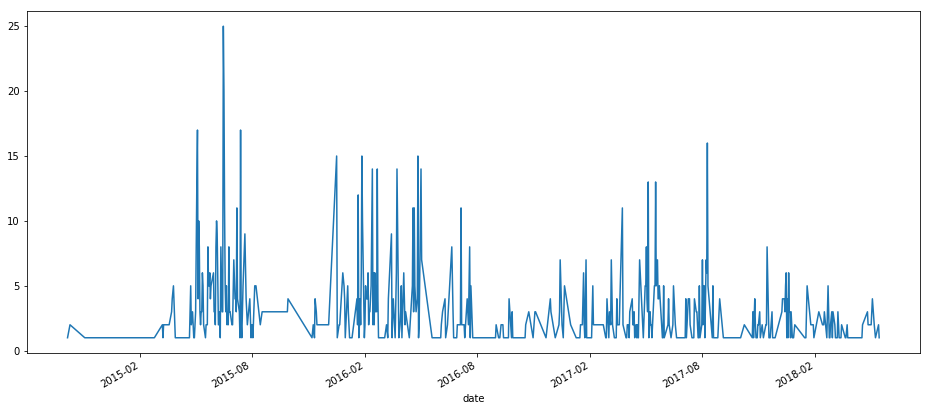

In [21]:
plt.figure(figsize=(16,7))
series.plot()
plt.show()  

### Here I have aggregated the number of answers per month and visualized the data with a simple barchart graohics where the high is the number of answers writen per month and the labels are relative to the months considered during the overall period from October 2014 to May 2018. 

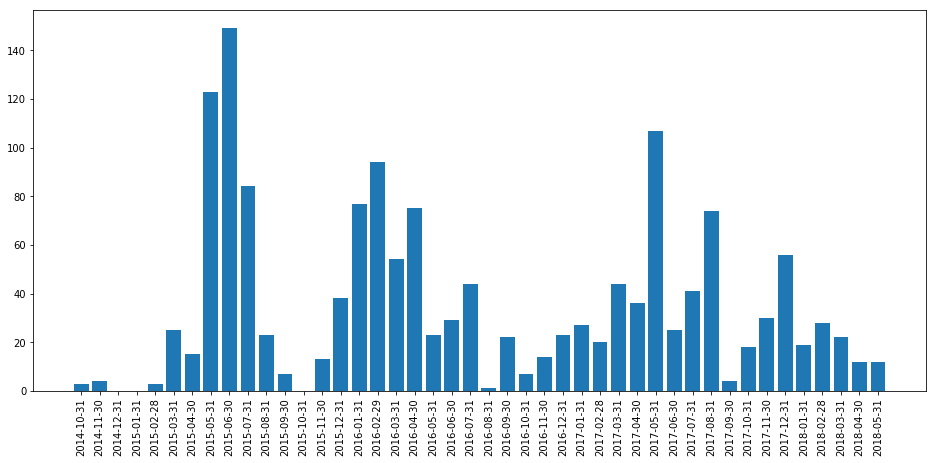

In [22]:
import pandas as pd
import numpy as np

dtf = pd.read_csv('NumberOfAnswersPerMonth.csv')
nrAnswers = dtf['nrAnswers'].tolist()

bars2 = ('2014-10-31','2014-11-30','2014-12-31','2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31',
'2015-06-30','2015-07-31','2015-08-31','2015-09-30','2015-10-31','2015-11-30',
'2015-12-31','2016-01-31','2016-02-29','2016-03-31','2016-04-30','2016-05-31',
'2016-06-30','2016-07-31','2016-08-31','2016-09-30','2016-10-31','2016-11-30','2016-12-31','2017-01-31','2017-02-28',
'2017-03-31','2017-04-30','2017-05-31','2017-06-30','2017-07-31','2017-08-31','2017-09-30','2017-10-31','2017-11-30',
'2017-12-31','2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31')
plt.figure(figsize=(16,7))
y_pos = np.arange(len(bars2))

# Create bars
plt.bar(y_pos, nrAnswers)
plt.xticks(rotation='vertical')
# Create names on the x-axis
plt.xticks(y_pos, bars2)

# Show graphic
plt.show()

### Which days of the week I have been more productive ? Given the date I could find the day of week (Monday Tuesadya ..), and count the number of answers given in a certain day. Below, in the barchart graphics is given the number of answers writen per week day. The days are labeled as 1 = Monday up to 7 = Sunday. In particular the days 2,3 and 4 which correspond to Tuesday, Wednesday and Thursay are the days in which I have been the most productive.

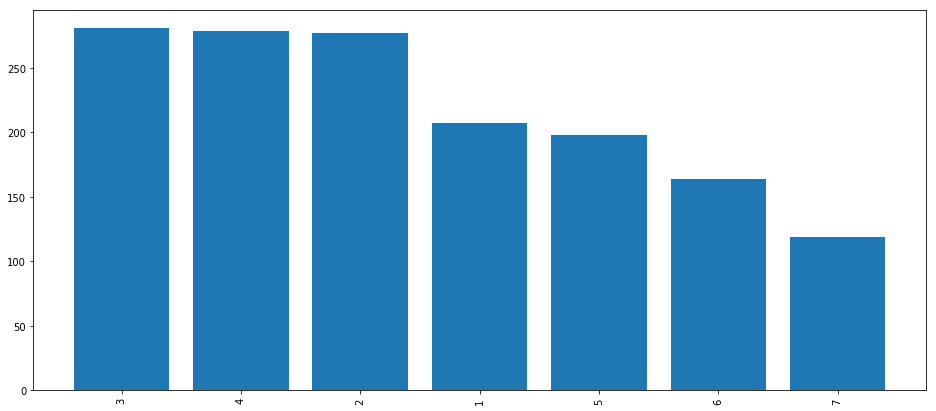

In [23]:
height = [281, 279, 277, 207, 198, 164, 119]
days = ('3', '4', '2', '1', '5', '6', '7')
plt.figure(figsize=(16,7))
y_pos = np.arange(len(days))

# Create bars
plt.bar(y_pos, height)
plt.xticks(rotation='vertical')
# Create names on the x-axis
plt.xticks(y_pos, days)
# Show graphic
plt.show()

### As for the text of my answers I did a simple word-cloud graphics in order to represent the most frequent words that occour in the text of my answers. The more frequent is a word the largest it will appear in the graphics. As you can see, the most frequent words in my graphics are : "data", "algorithms", "java", "r", "machine", "learning", "programming", "blockchain" etc.. There are also words which are typical of a person's writing style such as "different", "also","many", "good" etc..


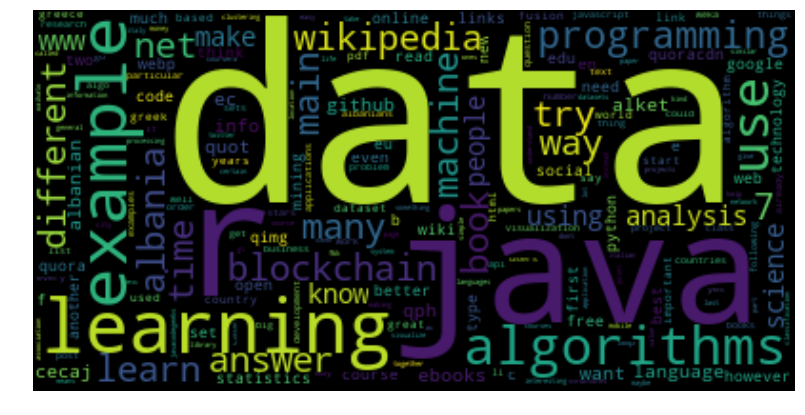

In [24]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("QuoraAnswersText.txt")
data = fp.read()

tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(data)

words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# and print them
sw = nltk.corpus.stopwords.words('english')

# Initialize new list that will contain text without stop words
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        if word != 'one' and word != 'would' and word != 'also' and word != 'find' and word != 'good' and word != 'like':
           words_ns.append(word)

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)

# here I add a word cloud graphics which shows the most common words

wcloud = WordCloud().generate_from_frequencies(freqdist1)
plt.figure(figsize=(16,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show() 

### Here I show a pairwise correlation matrix for the top words that compare in my questions. So I built a matrix with 0 and 1 according to the fact that one of the following words was contained in the answers or not . The top words for the pairwise correlation matrix are the following : 'r','java','programming','data','learn','development','javascript','algorithms','machine','blockchain','culture', 'albania','greece','italy','denmark'

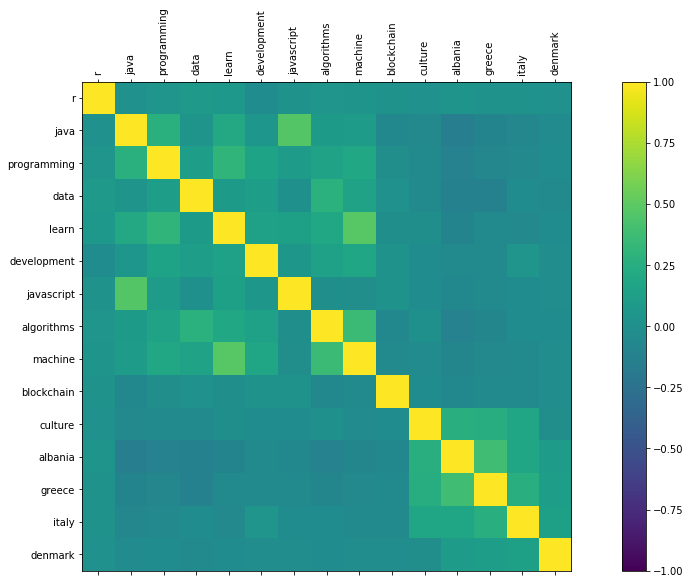

In [25]:
data = pd.read_csv('QuoraTopWordsForCorrMatrixGraphics.csv')
# my top 15 words correlation graphics 
names = ['r','java','programming','data','learn','development','javascript','algorithms','machine','blockchain','culture','albania','greece','italy','denmark']
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure(figsize=(18,9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
pyplot.show()

### So my conclusions about this analysis are mainly on how my activity on Quora shows some patterns which are those of usability and content. 
   - The usability pattern is due to me as a person, the days I have been able to write and the months in wich I have been more active. I wonder if the majority of Quora users with similar features as mine (age, location, education etc..) tend to show the same pattern. 
   - The second conclusion has to do with content and more precisely with my topics of interest as a Quora writer. For those topics I did a word cloud in order to show in a synthetic way what are the main interests I have and what I write about on Quora.
   - Third, the pairwise correlation matrix of the 15 most frequent words shows that there are two clusters (in light green and yellow). The first cluster is about answers where words such as "programming", "R", "algorithms" etc.. appear to be strongly correlated. In this cluster can be found answers regarding my professional experience. In the second cluster, which is smaller, words like "greece", "italy", "denmark" as well as "culture" appear to be correlated. In this cluster, can be found the answers regarding my human experience.   
   - Another interesting point that pops out from the last graphics is that by looking at my profile on Quora, you can see only my professional experience i.e. the small box in the bottom-right corner of my profile page. The pairwise correlation matrix instead would show also my personal human experience. Maybe by using this method of analysis at Quora they would be better at describing a certain user profile to other Quora users.    

### So this is the story I want to tell with my Quora data. I hope you liked it.  

### Oh! I forgot to add my profile on Quora! Here it is :  https://www.quora.com/profile/Alket-Cecaj

#### Best 
#### AC.